## CPMSC 448 Homework 2
### Problem 4

#### Name: Haorui Lyu
#### PSU id: 948671399


In this problem will use the Pima Indians Diabetes dataset from the UCI repository to experiment with the $k$-NN algorithm and find the optimal value for the number of neighbors  $k$. You do not need to implement the algorithm and encouraged to use the implementation in \texttt{scikit-learn}.


### a) 
Download the provided `Pima.csv` data file and load it using `pandas`. As a sanity check, make sure  there are 768 rows of data (potential diabetes patients) and 9 columns (8 input features including  `Pregnancies`, `Glucose`, `BloodPressure`, `SkinThickness`, `Insulin`, `BMI`, `DiabetesPedigreeFunction`, `Age`, and 1 target output). Note that the data file has no header and you might want to explicitly create the header. The last value in each row contains the target label for that row, and the remaining values are the features. Report the statics of each feature (min, max, average) and the histogram of the labels (target outputs).
    

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max.columns', 100)
# to draw pictures in jupyter notebook
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns
# we don't like warnings
# you can comment the following 2 lines if you'd like to
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('Pima.csv')
pd.DataFrame(data)
data.columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'TargetOutput']
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,TargetOutput
count,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000
mean,3.842243,120.859192,69.101695,20.517601,79.903520,31.990482,0.471674,33.219035,0.348110
std,3.370877,31.978468,19.368155,15.954059,115.283105,7.889091,0.331497,11.752296,0.476682
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243500,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,32.000000,32.000000,0.371000,29.000000,0.000000
75%,6.000000,140.000000,80.000000,32.000000,127.500000,36.600000,0.625000,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'TargetOutput'}>]], dtype=object)

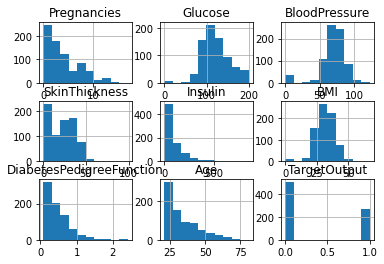

In [4]:
data.hist()

Text(0, 0.5, 'Count')

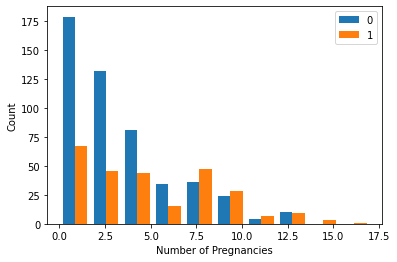

In [5]:
x_axis = data.loc[data['TargetOutput'] == 0]['Pregnancies']
y_axis = data.loc[data['TargetOutput'] == 1]['Pregnancies']
plt.hist([x_axis, y_axis], label=['0', '1'])
plt.legend(loc='upper right')
plt.xlabel('Number of Pregnancies')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

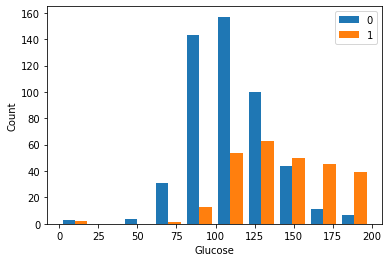

In [6]:
x_axis = data.loc[data['TargetOutput'] == 0]['Glucose']
y_axis = data.loc[data['TargetOutput'] == 1]['Glucose']
plt.hist([x_axis, y_axis], label=['0', '1'])
plt.legend(loc='upper right')
plt.xlabel('Glucose')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

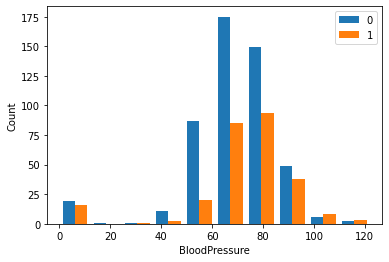

In [54]:
x_axis = data.loc[data['TargetOutput'] == 0]['BloodPressure']
y_axis = data.loc[data['TargetOutput'] == 1]['BloodPressure']
plt.hist([x_axis, y_axis], label=['0', '1'])
plt.legend(loc='upper right')
plt.xlabel('BloodPressure')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

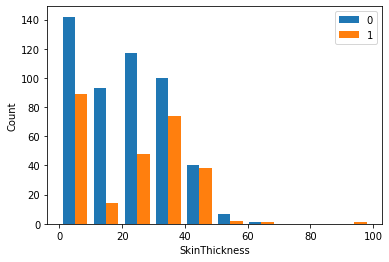

In [55]:
x_axis = data.loc[data['TargetOutput'] == 0]['SkinThickness']
y_axis = data.loc[data['TargetOutput'] == 1]['SkinThickness']
plt.hist([x_axis, y_axis], label=['0', '1'])
plt.legend(loc='upper right')
plt.xlabel('SkinThickness')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

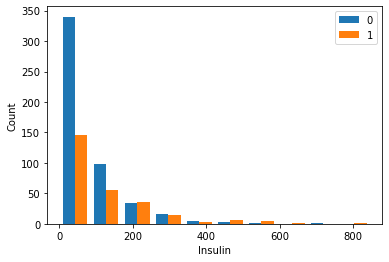

In [56]:
x_axis = data.loc[data['TargetOutput'] == 0]['Insulin']
y_axis = data.loc[data['TargetOutput'] == 1]['Insulin']
plt.hist([x_axis, y_axis], label=['0', '1'])
plt.legend(loc='upper right')
plt.xlabel('Insulin')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

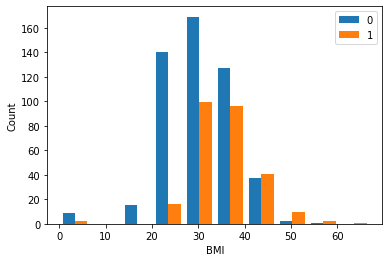

In [57]:
x_axis = data.loc[data['TargetOutput'] == 0]['BMI']
y_axis = data.loc[data['TargetOutput'] == 1]['BMI']
plt.hist([x_axis, y_axis], label=['0', '1'])
plt.legend(loc='upper right')
plt.xlabel('BMI')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

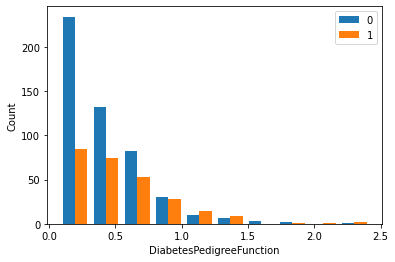

In [58]:
x_axis = data.loc[data['TargetOutput'] == 0]['DiabetesPedigreeFunction']
y_axis = data.loc[data['TargetOutput'] == 1]['DiabetesPedigreeFunction']
plt.hist([x_axis, y_axis], label=['0', '1'])
plt.legend(loc='upper right')
plt.xlabel('DiabetesPedigreeFunction')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

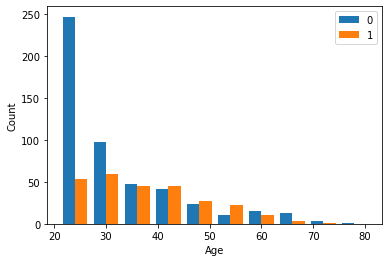

In [59]:
x_axis = data.loc[data['TargetOutput'] == 0]['Age']
y_axis = data.loc[data['TargetOutput'] == 1]['Age']
plt.hist([x_axis, y_axis], label=['0', '1'])
plt.legend(loc='upper right')
plt.xlabel('Age')
plt.ylabel('Count')

### b) 
Split the data into training and test data with 80\% training and 20\% test data sizes. 

Use 5-fold cross-validation on training data to decide the best number of neighbours $k$. To this end, you can use the built in functionality in  `scikit-learn` such as `cross_val_score`. For $k=1,2,3,\ldots, 15$ compute the 5-fold cross validation error and plot the results  (with values of $k$ on the $x$-axis and accuracy on the $y$-axis). Include the plot in your report and justify your decision for picking a particular number of neighbors $k$.

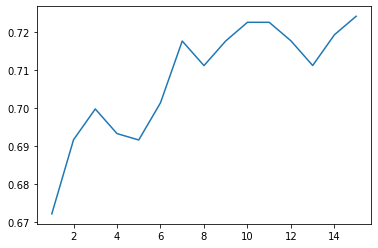

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
features = data[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]
TargetOutput = data['TargetOutput']
X_train, X_test, y_train, y_test = train_test_split(features, TargetOutput, test_size = 0.2, random_state = 42)
cross_val_scores = []
k = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
for i in k:
    knn = KNeighborsClassifier(n_neighbors = i)
    scores = cross_val_score(knn, X_train, y_train, cv = 5)
    cross_val_scores.append(np.mean(scores))
    
plt.plot(k, cross_val_scores)

### c ) 
Evaluate the $k$-NN algorithm on test data with the optimal number of neighbours you obtained in previous step and report the test error.

In [5]:
best_n_neighbors = k[np.argmax(cross_val_scores)]
print("Optimal Number of Neighbors: {0}".format(best_n_neighbors))
knn = KNeighborsClassifier(n_neighbors = best_n_neighbors)
knn.fit(X_train, y_train)
print("Test error: {:.3f}".format(1-knn.score(X_test, y_test)))

Optimal Number of Neighbors: 15
Test error: 0.266


### d) 
Process the input data  by subtracting the mean (a.k.a. centralization) and dividing by the standard deviation (a.k.a. standardization) over each dimension (feature),  repeat the previous part and report the accuracy. Do centralization and standardization affect the accuracy? Why?

In [6]:
for i in ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']:
    mean = data[i].mean()
    std = data[i].std()
    X_test[i] = (X_test[i] - mean)/std
    X_train[i] = (X_train[i] - mean)/std

In [7]:
best_n_neighbors = k[np.argmax(cross_val_scores)]
print("Optimal Number of Neighbors: {0}".format(best_n_neighbors))
knn = KNeighborsClassifier(n_neighbors = best_n_neighbors)
knn.fit(X_train, y_train)
print("Test error: {:.3f}".format(1-knn.score(X_test, y_test)))

Optimal Number of Neighbors: 15
Test error: 0.234
